In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

plt.style.use(["fivethirtyeight"])

## Article analysis

In [2]:
articles_data_df = pd.read_csv("data/articles.csv", encoding="utf-8")

In [3]:
articles_data_df.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [4]:
print(f"Article df shape : {articles_data_df.shape}")

Article df shape : (105542, 25)


In [5]:
articles_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [6]:
missing_values = articles_data_df.isnull().sum()
columns_missing_values = missing_values[missing_values != 0]
print(f"There is %d columns with missing values" % len(columns_missing_values))
print("Columns with missing values: ", columns_missing_values.index.to_list())

There is 1 columns with missing values
Columns with missing values:  ['detail_desc']


In [7]:
percentage_missing_values = articles_data_df.isnull().sum() / len(articles_data_df) * 100
percentage_missing_values = percentage_missing_values[percentage_missing_values != 0]
print("Percentage missing values per feature: ", percentage_missing_values)

Percentage missing values per feature:  detail_desc    0.394156
dtype: float64


In [8]:
unique_value_counts = articles_data_df.dtypes
unique_value_counts

article_id                       int64
product_code                     int64
prod_name                       object
product_type_no                  int64
product_type_name               object
product_group_name              object
graphical_appearance_no          int64
graphical_appearance_name       object
colour_group_code                int64
colour_group_name               object
perceived_colour_value_id        int64
perceived_colour_value_name     object
perceived_colour_master_id       int64
perceived_colour_master_name    object
department_no                    int64
department_name                 object
index_code                      object
index_name                      object
index_group_no                   int64
index_group_name                object
section_no                       int64
section_name                    object
garment_group_no                 int64
garment_group_name              object
detail_desc                     object
dtype: object

### Univariate analysis

The goal of univariate analysis is to understand the distribution and characteristics of each variable independently.

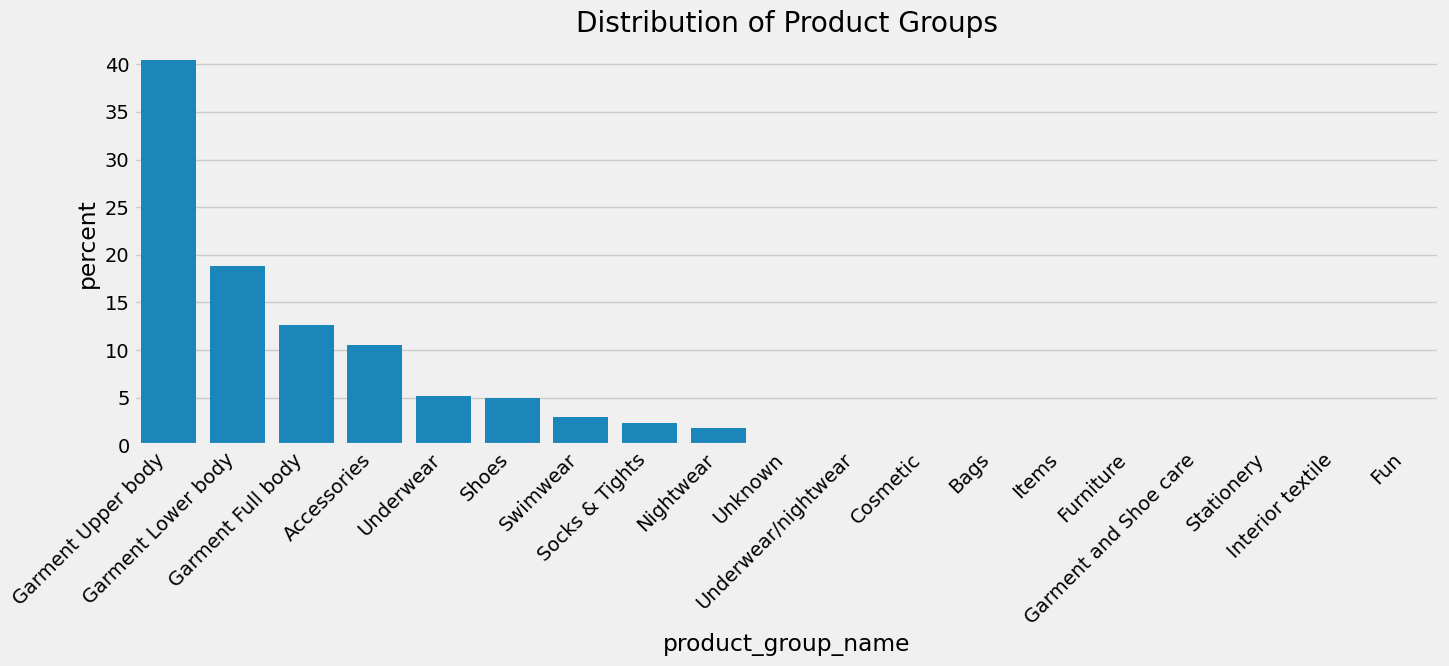

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
sns.countplot(x="product_group_name", data=articles_data_df, order=articles_data_df["product_group_name"].value_counts().index, stat="percent")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Product Groups")
plt.show()

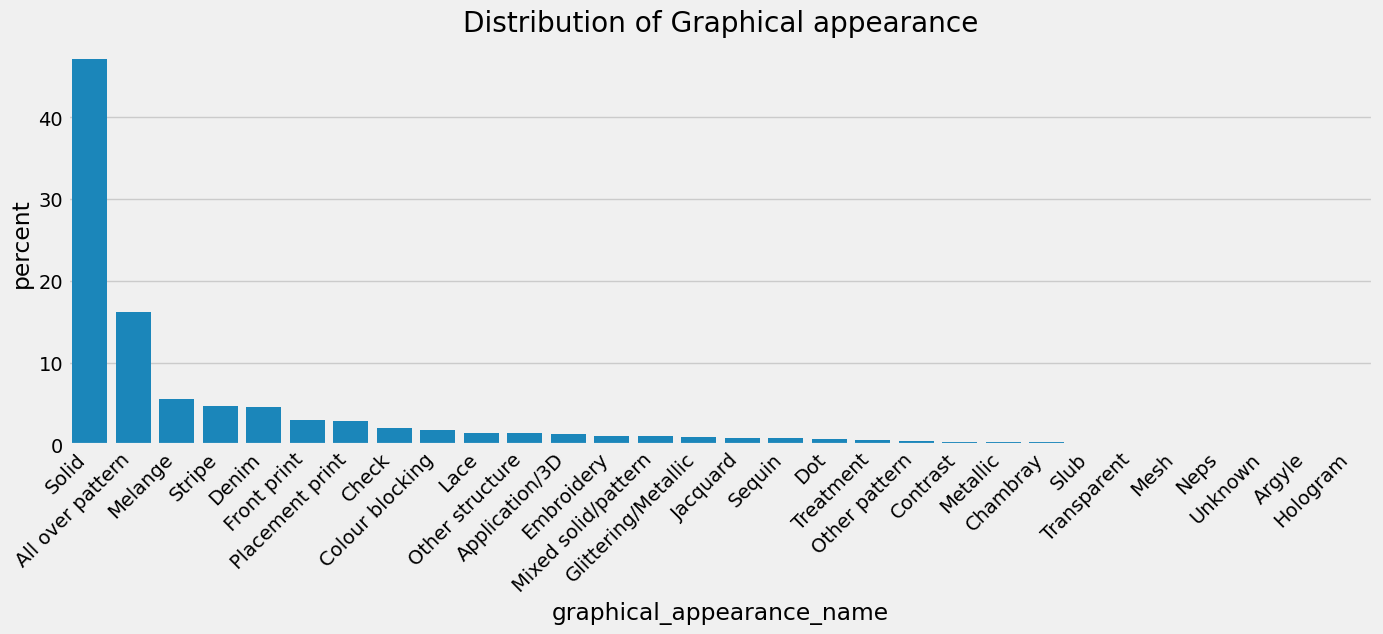

In [10]:
plt.figure(figsize=(15, 5))
sns.countplot(x="graphical_appearance_name", data=articles_data_df, order=articles_data_df["graphical_appearance_name"].value_counts().index, stat="percent")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Graphical appearance")
plt.show()

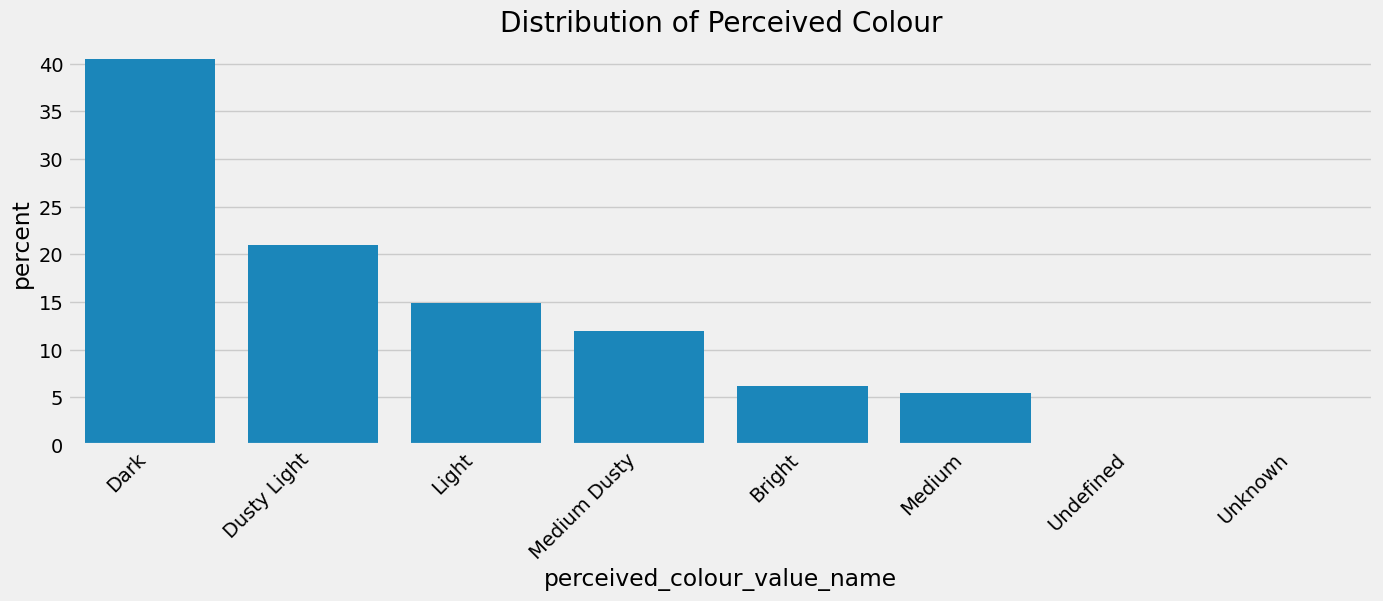

In [11]:
plt.figure(figsize=(15, 5))
sns.countplot(x="perceived_colour_value_name", data=articles_data_df, order=articles_data_df["perceived_colour_value_name"].value_counts().index, stat="percent")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Perceived Colour")
plt.show()

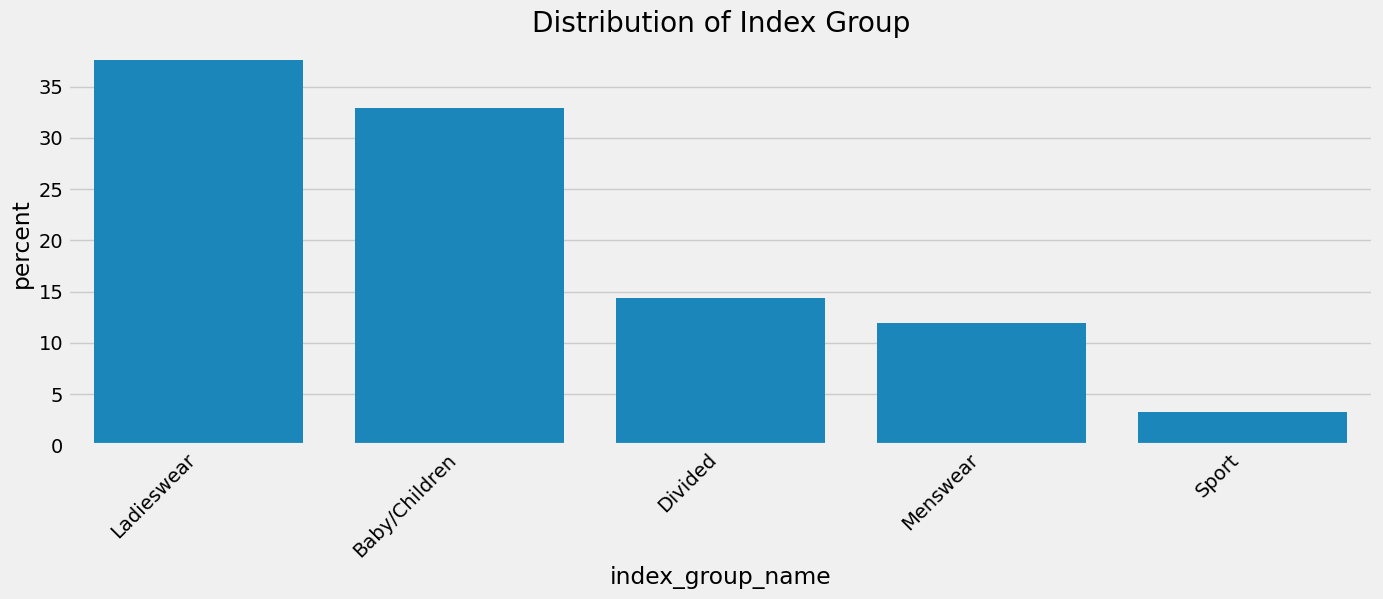

In [12]:
plt.figure(figsize=(15, 5))
sns.countplot(x="index_group_name", data=articles_data_df, order=articles_data_df["index_group_name"].value_counts().index, stat="percent")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Index Group")
plt.show()

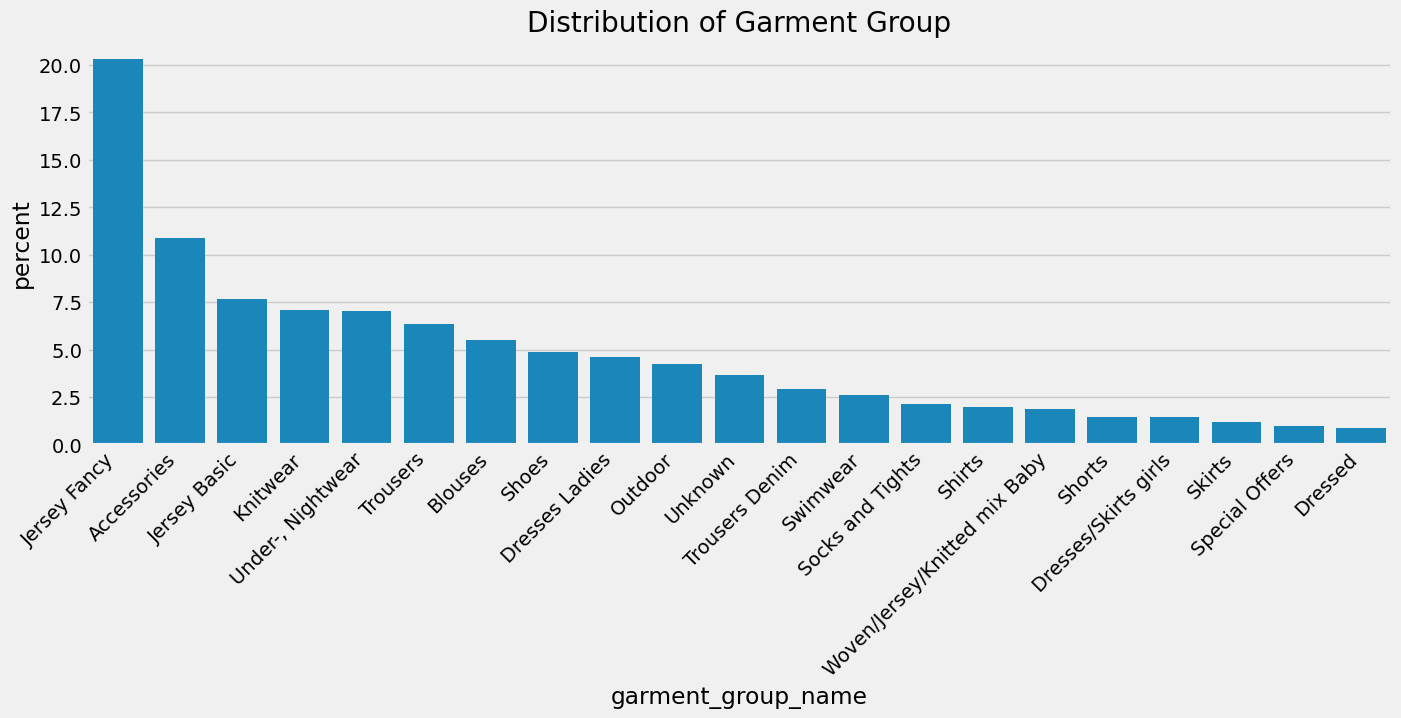

In [13]:
plt.figure(figsize=(15, 5))
sns.countplot(x="garment_group_name", data=articles_data_df, order=articles_data_df["garment_group_name"].value_counts().index, stat="percent")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Garment Group")
plt.show()

-  The "Jersey Fancy" category has the highest percentage, approaching 20%. This suggests that it is the most common garment group in the dataset and might represent a popular or high-stocked item.
- "Accessories" comes second, it only reaches a bit over 10%.
- Categories such as "Dressed," "Special Offers," "Skirts," and "Dresses/Skirts Girls" have a very low presence (below 2.5%). This could indicate that these items are either:
	- less popular
	- seasonal
	- not heavily stocked.
- The distribution is highly uneven, with a few groups dominating.
- low-percentage categories might be specialty items or have a niche audience.
- Unknown Category are directly categories which could indicate missing or uncategorized data.

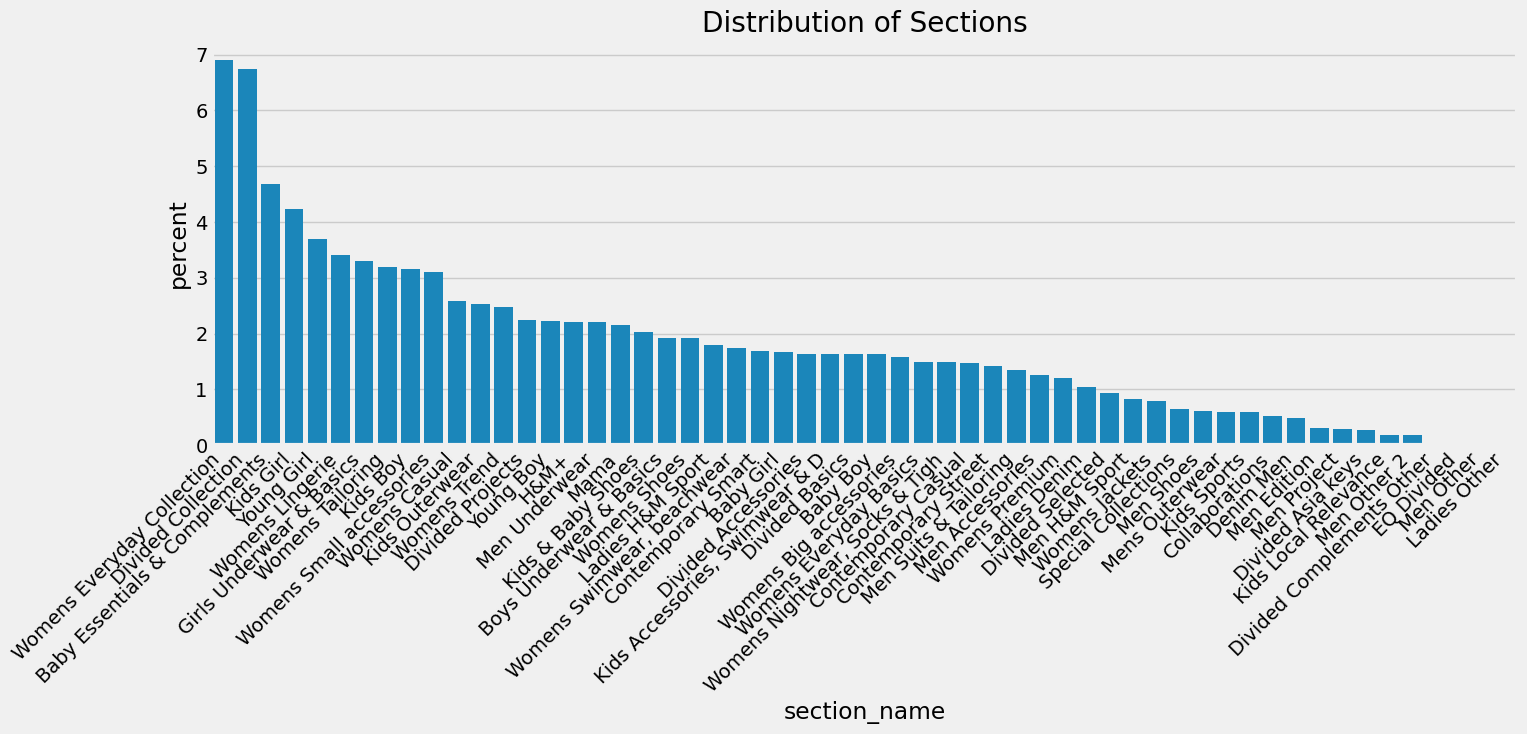

In [14]:
plt.figure(figsize=(15, 5))
sns.countplot(x="section_name", data=articles_data_df, order=articles_data_df["section_name"].value_counts().index, stat="percent")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Sections")
plt.show()

-  The plot shows a wide variety of sections, indicating a diverse product offering. However, there’s a steep drop from the top sections to the lower ones, which suggests that some sections dominate the inventory more than others.
- "Womens Everyday Collection" section has the highest percentage, close to 7%. This suggests that products within this section are the most common or heavily stocked, possibly indicating a focus on women’s daily wear as a priority area.

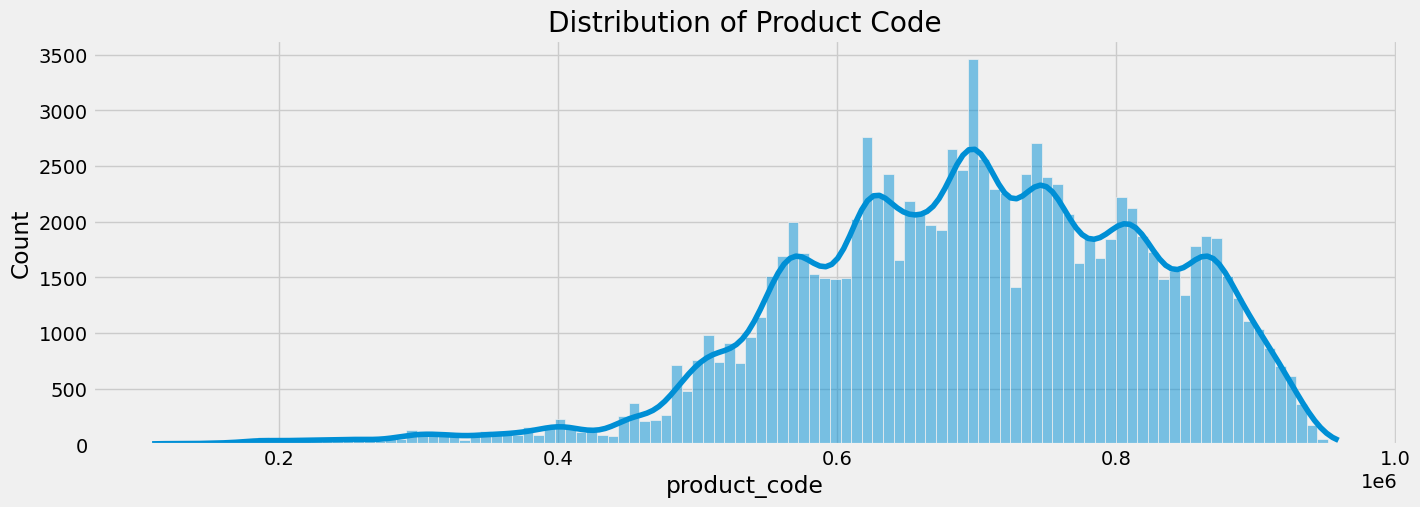

In [15]:
plt.figure(figsize=(15, 5))
sns.histplot(articles_data_df["product_code"], kde=True)
plt.title("Distribution of Product Code")
plt.show()

- One big peak peak between 0.5 and 0.7 million, indicating that a large number of products fall within this range of product codes. This could imply that H&M introduced a significant number of products or item variations in this range (possibly corresponding to a specific time or product line).
- There are several smaller peaks on both sides of the main concentration. These could represent different product categories, batches, or release cycles within the dataset.
- The left part has a lower density. This may suggest that less common products have lower product codes.
- If the product codes are assigned sequentially or in blocks, the distribution could reflect time-based patterns (such as product lines launched at different periods). The density around certain ranges might also indicate higher popularity or frequent restocking of products within those code ranges.

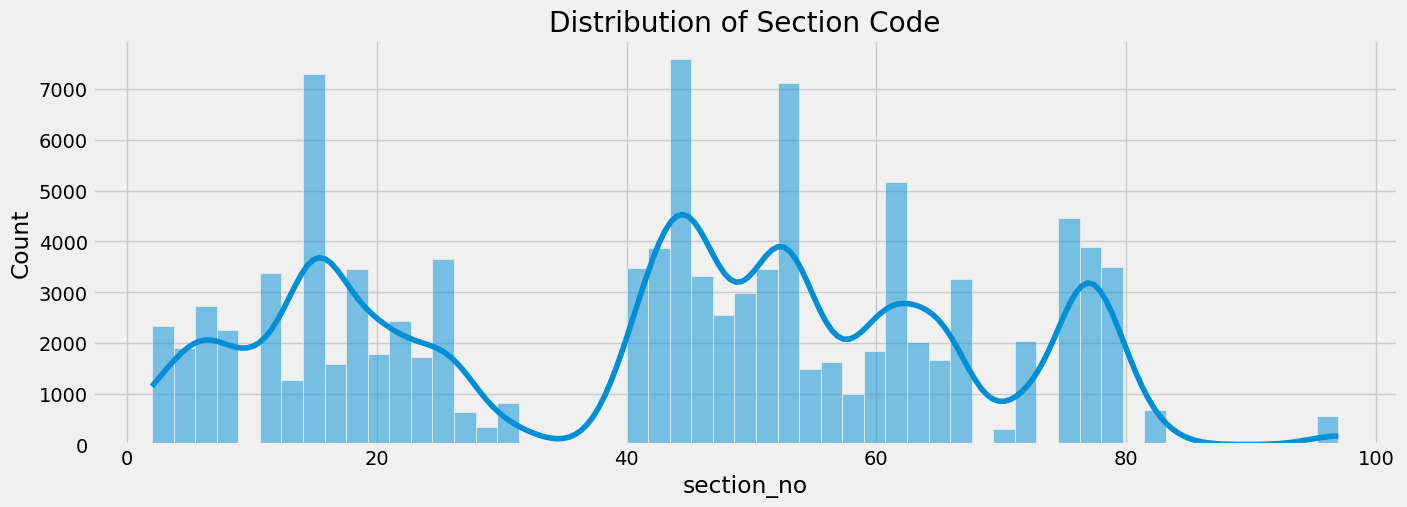

In [20]:
plt.figure(figsize=(15, 5))
sns.histplot(articles_data_df["section_no"], kde=True)
plt.title("Distribution of Section Code")
plt.show()